In [848]:
import pandas as pd
import io, gzip
from codecs import decode
import pysrt
import datetime as dt
import base64
import re
import numpy as np
import sys
from xmlrpc.client import ServerProxy
import os as os
import os.path
import json
import xarray as xr
import matplotlib.pyplot as plt
import pylab as pl
from nltk.collocations import *
from nltk.corpus import stopwords
import pprint
from gensim import corpora, models, similarities
import nltk
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

In [849]:
tokenizer = RegexpTokenizer("\w+")
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
stop_words=set(stopwords.words('english'))

# Usefull things

# Import the files

In [850]:
subd=pd.read_hdf('Sub_data.h5', 'subs')
movd=pd.read_hdf('movbaseB.h5', 'imdb_id')

In [851]:
print('Number subs in database: {}'.format(len(subd.columns.levels[0])))

Number subs in database: 857


Remove ones with very short length, meaning something went wrong in the parsing and downloading process.

In [852]:
for item in subd.columns.levels[0]:
    n_lines=len(subd[item][subd[item]['Line'] != ''])
    if n_lines < 100:
        subd.drop(item,axis=1,level=0,inplace=True)
        subd.columns = pd.MultiIndex.from_tuples(subd.columns.to_series())

In [853]:
print('Number subs after removel of shitty ones: {}'.format(len(subd.columns.levels[0])))

Number subs after removel of shitty ones: 837


In [854]:
raw_txt={}
for item in subd.columns.levels[0]:
        raw_txt[item]=" ".join(subd[item]['Line']).strip().lower()
        raw_txt[item]=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', raw_txt[item]) #removes web addressses
        raw_txt[item]=re.sub('<[^>]+>', '', raw_txt[item]) #removes < crap > 

In [763]:
for key, value in raw_txt.items():
    print('Imdb_id: {}  Length: {} Genre: {} Title: {}'
          .format(key,len(value), movd.loc[movd['imdb_id'] == key, 'Genre'].values[0]
                  , movd.loc[movd['imdb_id'] == key, 'Title'].values[0]))

Imdb_id: 0031381  Length: 137449 Genre: Romance Title: Gone with the Wind
Imdb_id: 0034492  Length: 10544 Genre: Family Title: Bambi
Imdb_id: 0042332  Length: 30760 Genre: Family Title: Cinderella
Imdb_id: 0059742  Length: 96198 Genre: Music Title: The Sound of Music
Imdb_id: 0068646  Length: 61143 Genre: Drama Title: The Godfather
Imdb_id: 0070047  Length: 38184 Genre: Horror Title: The Exorcist
Imdb_id: 0073195  Length: 45078 Genre: Horror Title: Jaws
Imdb_id: 0076666  Length: 62851 Genre: Music Title: Saturday Night Fever
Imdb_id: 0076759  Length: 53896 Genre: Action Title: Star Wars
Imdb_id: 0077631  Length: 46730 Genre: Romance Title: Grease
Imdb_id: 0077766  Length: 29548 Genre: Horror Title: Jaws 2
Imdb_id: 0083866  Length: 32872 Genre: Family Title: E.T. the Extra-Terrestrial
Imdb_id: 0084602  Length: 52064 Genre: Drama Title: Rocky III
Imdb_id: 0087355  Length: 8881 Genre: Documentary Title: Grand Canyon: The Hidden Secrets
Imdb_id: 0087363  Length: 27466 Genre: Horror Title: 

Imdb_id: 0762107  Length: 73455 Genre: Comedy Title: I Now Pronounce You Chuck & Larry
Imdb_id: 0765429  Length: 67127 Genre: Drama Title: American Gangster
Imdb_id: 0770828  Length: 37943 Genre: Action Title: Man of Steel
Imdb_id: 0780521  Length: 49549 Genre: Music Title: The Princess and the Frog
Imdb_id: 0790724  Length: 51646 Genre: Drama Title: Jack Reacher
Imdb_id: 0795421  Length: 50124 Genre: Comedy Title: Mamma Mia!
Imdb_id: 0816692  Length: 69755 Genre: Drama Title: Interstellar
Imdb_id: 0816711  Length: 37450 Genre: Action Title: World War Z
Imdb_id: 0817230  Length: 72857 Genre: Comedy Title: Valentine's Day
Imdb_id: 0829150  Length: 19137 Genre: Action Title: Dracula Untold
Imdb_id: 0837562  Length: 48422 Genre: Family Title: Hotel Transylvania
Imdb_id: 0848228  Length: 54530 Genre: Action Title: The Avengers
Imdb_id: 0879870  Length: 59072 Genre: Drama Title: Eat Pray Love
Imdb_id: 0892791  Length: 37056 Genre: Family Title: Shrek Forever After
Imdb_id: 0903624  Length: 

Imdb_id: 1911658  Length: 39052 Genre: Family Title: Penguins of Madagascar
Imdb_id: 1951261  Length: 45730 Genre: Comedy Title: The Hangover Part III
Imdb_id: 1951264  Length: 47565 Genre: Action Title: The Hunger Games: Catching Fire
Imdb_id: 1951266  Length: 43848 Genre: Action Title: The Hunger Games: Mockingjay - Part 2
Imdb_id: 2015381  Length: 42792 Genre: Action Title: Guardians of the Galaxy
Imdb_id: 2017020  Length: 56988 Genre: Family Title: The Smurfs 2
Imdb_id: 2023587  Length: 22940 Genre: Horror Title: Mama
Imdb_id: 2084970  Length: 59005 Genre: Drama Title: The Imitation Game
Imdb_id: 2096673  Length: 47595 Genre: Family Title: Inside Out
Imdb_id: 2103281  Length: 3012 Genre: Action Title: Dawn of the Planet of the Apes
Imdb_id: 2109184  Length: 36417 Genre: Horror Title: Paranormal Activity 4
Imdb_id: 2109248  Length: 72534 Genre: Action Title: Transformers: Age of Extinction
Imdb_id: 2126355  Length: 37944 Genre: Action Title: San Andreas
Imdb_id: 2203939  Length: 590

In [726]:
print(raw_txt['3896198'])

missouri earth (singing along with "brandy" on the car stereo) - come on! - slow down. what do you say, my river lily? come on! where are you taking me? come on, come on, come on. look. look. oh, it's beautiful! i was afraid it wouldn't take to this soil. but it rooted quickly. and soon it'll be everywhere. all across the universe. well i don't know what you're talking about... ...but i like the way you say it. my heart is yours... meredith quill. i can't believe i fell in love with a spaceman. 34 years later the sovereign planet showtime, a-holes! it's gonna be here any minute. which will be its loss. i thought your thing was a sword. we've been hired to stop an inter-dimensional beast... ...from feeding on those batteries, and i'm gonna stop it with a sword? it's just, swords were your thing and guns were mine but i guess we're both doing guns now. i just didn't know that. drax, why aren't you wearing one of rocket's aero-rigs? it hurts. hurts? i have sensitive nipples. ha ha ha! my 

In [855]:
mltk={}
fdist={}
mtok={}
for item in subd.columns.levels[0]:
    mtok[item]=[w for w in tokenizer.tokenize(raw_txt[item]) if not w in stop_words]
    mltk[item]=nltk.Text([w for w in tokenizer.tokenize(raw_txt[item]) if not w in stop_words])
    fdist[item]=FreqDist(mltk[item])

# Lexical Richness by Genre

In [857]:
lexical_richness_genre=dict.fromkeys(movd.Genre.unique(),0)
genre_count=dict.fromkeys(movd.Genre.unique(),0)

In [858]:
for item in subd.columns.levels[0]:
    for key, value in genre_count.items():
        if movd.loc[movd['imdb_id'] == item, 'Genre'].values[0] == key:
            genre_count[key] += 1

In [860]:
genre_count

{'Action': 133,
 'Comedy': 66,
 'Documentary': 6,
 'Drama': 112,
 'Family': 273,
 'Horror': 103,
 'Music': 70,
 'Romance': 74}

In [861]:
lexical_richness={}
for item in subd.columns.levels[0]:
    lexical_richness[item]=(len(set(mltk[item]))/len(mltk[item])*100)

In [862]:
for item in subd.columns.levels[0]:
    for key, value in lexical_richness_genre.items():
        if movd.loc[movd['imdb_id'] == item, 'Genre'].values[0] == key:
            lexical_richness_genre[key] += (len(set(mltk[item]))/len(mltk[item])*100)

In [863]:
lexical_richness_genre

{'Action': 4862.838119044893,
 'Comedy': 2019.870387775573,
 'Documentary': 260.35259479639586,
 'Drama': 3820.78633505633,
 'Family': 9248.610387554269,
 'Horror': 3747.674463572334,
 'Music': 2188.412877963559,
 'Romance': 2521.191866852553}

In [864]:
LRG={k: float(lexical_richness_genre[k])/float(genre_count[k]) for k in genre_count}

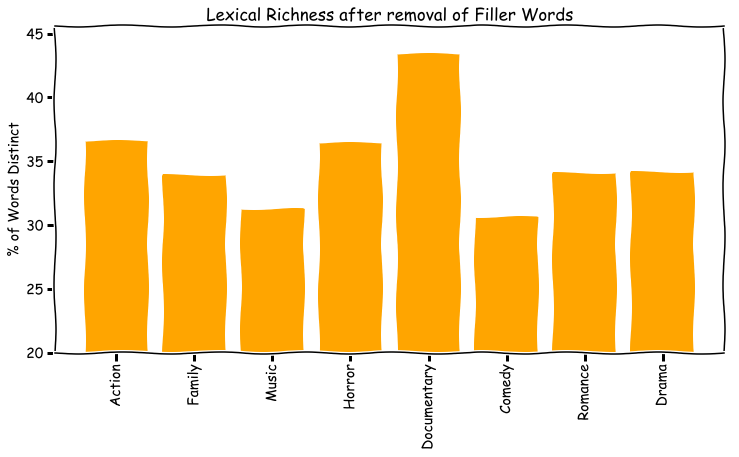

In [865]:
plt.bar(range(len(LRG)), LRG.values(), align='center', color='Orange')
plt.xticks(range(len(LRG)), LRG.keys(),rotation='vertical')
#pl.xlabel("Types of Idiots")
pl.ylabel("% of Words Distinct")
pl.title("Lexical Richness after removal of Filler Words")
plt.rcParams["figure.figsize"] = [12,6]
plt.xkcd()
plt.ylim(ymin=20)
plt.show()

In [765]:
mltk['0120755'].collocations()

hey hey; souca souca; wanna hate; miss hall; search hero; souca mama;
jacket pocket; teach soon; soon belong; gone gone; bury gone; gone
teach; come come; shh shh; created monster; arrive destination;
naturally vain; requires villain; sing lately; villain therefore


In [790]:
tgs = nltk.bigrams(mltk['0120755'])
fdt = nltk.FreqDist(tgs)
for k,v in fdt.items():
    print(k,v)

('well', 'dmitri') 2
('dmitri', 'every') 1
('every', 'search') 3
('search', 'hero') 6
('hero', 'must') 3
('must', 'begin') 3
('begin', 'something') 3
('something', 'every') 3
('every', 'hero') 3
('hero', 'requires') 3
('requires', 'villain') 3
('villain', 'therefore') 3
('therefore', 'search') 3
('hero', 'bellerophon') 3
('bellerophon', 'created') 3
('created', 'monster') 4
('monster', 'chimera') 3
('chimera', 'beg') 2
('beg', 'dmitri') 2
('dmitri', 'come') 2
('come', 'sydney') 2
('sydney', 'accompany') 2
('accompany', 'atlanta') 2
('atlanta', 'immediately') 2
('immediately', 'however') 2
('however', 'travel') 3
('travel', 'must') 3
('must', 'arrive') 3
('arrive', 'destination') 3
('destination', 'within') 3
('within', '20') 5
('20', 'hours') 7
('hours', 'departure') 3
('departure', 'ring') 1
('ring', 'around') 1
('around', 'rosies') 1
('rosies', 'pocket') 1
('pocket', 'full') 1
('full', 'posies') 1
('posies', 'ashes') 1
('ashes', 'ashes') 1
('ashes', 'fall') 1
('fall', 'folks') 1
('fo

('choice', 'doubled') 1
('doubled', 'two') 1
('two', 'three') 1
('three', 'times') 1
('times', 'twice') 1
('twice', 'think') 1
('think', 'reservations') 1
('reservations', 'little') 1
('little', 'late') 2
('late', 'asking') 1
('asking', 'necessarily') 1
('necessarily', 'airline') 1
('airline', 'records') 1
('records', 'list') 1
('list', 'captain') 1
('captain', 'harold') 1
('harold', 'macintosh') 1
('macintosh', 'pilot') 1
('pilot', 'flight') 1
('flight', '2207') 1
('2207', 'far') 1
('far', 'media') 1
('media', 'government') 1
('government', 'agencies') 1
('agencies', 'concerned') 1
('concerned', 'captain') 1
('captain', 'macintosh') 1
('macintosh', 'died') 1
('died', 'flight') 1
('flight', 'fact') 1
('fact', 'missed') 1
('missed', 'however') 1
('however', 'make') 1
('make', 'next') 1
('next', 'flight') 1
('flight', 'cargo') 1
('cargo', 'stuffed') 1
('stuffed', 'rather') 1
('rather', 'small') 1
('small', 'suitcase') 1
('suitcase', 'considering') 1
('considering', 'size') 1
('size', 'so

('security', 'minimal') 1
('minimal', 'undoubtedly') 1
('undoubtedly', 'engage') 1
('engage', 'aerobatic') 1
('aerobatic', 'insanity') 1
('insanity', 'risk') 1
('risk', 'harming') 1
('harming', 'hair') 1
('hair', 'security') 1
('security', 'guard') 1
('guard', 'head') 1
('head', 'check') 1
('check', 'check') 1
('check', 'got') 1
('got', 'copy') 1
('copy', 'five') 1
('five', 'five') 1
('five', 'luther') 1
('luther', 'doin') 1
('doin', 'yet') 1
('yet', 'ethan') 1
('ethan', 'give') 1
('give', 'word') 1
('word', 'billy') 1
('billy', 'ready') 1
('ready', 'go') 1
('go', 'okay') 1
('okay', 'package') 1
('package', 'away') 1
('away', 'five') 1
('five', 'ready') 1
('ready', 'louvres') 1
('louvres', 'moving') 1
('moving', 'come') 1
('come', 'luther') 2
('luther', 'gotta') 1
('gotta', 'go') 1
('go', 'wait') 1
('wait', 'glitch') 1
('glitch', 'access') 1
('access', 'code') 1
('code', 'luther') 1
('luther', 'time') 1
('time', 'count') 1
('count', 'please') 1
('please', 'baby') 1
('baby', 'open') 1
(

# ANOTHER LDA

# Random

In [479]:
hv.transform(corpus)

<3396x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 10856 stored elements in Compressed Sparse Row format>

In [519]:
test = ['discriminating','fucking','fucker', 'fucked','fuckest','fuckster','hierarchy','shit','die']
tst=[p_stemmer.stem(i) for i in test]
print(test)
print(tst)

['discriminating', 'fucking', 'fucker', 'fucked', 'fuckest', 'fuckster', 'hierarchy', 'shit', 'die']
['discrimin', 'fuck', 'fucker', 'fuck', 'fuckest', 'fuckster', 'hierarchi', 'shit', 'die']


In [480]:
hv

HashingVectorizer(alternate_sign=True, analyzer='word', binary=False,
         decode_error='strict', dtype=<class 'numpy.float64'>,
         encoding='utf-8', input='content', lowercase=True,
         n_features=1000, ngram_range=(1, 1), non_negative=False,
         norm='l2', preprocessor=None, stop_words='english',
         strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
         tokenizer=None)

In [845]:
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 40
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

data_samples=list(raw_txt.values())

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.6, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=1,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extracting tf-idf features for NMF...
done in 2.546s.
Extracting tf features for LDA...
done in 2.534s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 1.105s.

Topics in NMF model (Frobenius norm):
Topic #0: mom uh shit honey married dr ain daddy doctor kids phone mrs city school york mama daughter brother ass office
Topic #1: fuck fucking shit fuckin ass fucked dude bitch jesus bullshit ben ain christ daniel asshole eddie mum gun jimmy yo
Topic #2: ok uh camera katie ya food mary manny aah flight mark alright million em seconds ohh honey fuck crew board
Topic #3: uh gasps sighs chuckles laughing continues grunts grunting laughs ha whoa chattering um panting hmm screaming groans screams ooh aah
Topic #4: lt lf ls mom annie princess ben law honey prince sword ice travel sun earth street english chicago harry afternoon
Topic #5: harry potter hermione ron professor lord magic dark bloody mum brilliant castle tom black school fre

done in 13.566s.

Topics in LDA model:
Topic #0: yxcexbfu txcexbf king sir david fuck speak shit father mr afraid husband mrs ah war darling papa great dad chuckles
Topic #1: love jerry father yeah old beast knew kill okay michael uh happened sleep hello people song true ready hey round
Topic #2: gasps sighs okay hey uh chuckles ha laughing continues grunts yeah screaming grunting whoa ed panting laughs playing groans dory
Topic #3: sir hey okay gonna yeah love mr god uh hell shit new dead night door hold ha great best mike
Topic #4: alan phil tony fuck fucking yeah shit hey god gonna okay gold car night gotta huh kill baby jesus guy
Topic #5: yeah okay hey gonna love guys god great uh fuck shit hi guy dad fucking night wanna maybe baby big
Topic #6: xb6 men mike round truth mm women ha control escape great giving guy morning smile water air larry seconds ask
Topic #7: love father old kill people won mr god dear world mother night course years girl shall king lord men heart
Topic #8: s

In [847]:
len(rawt)

0

In [414]:
drink_filter=lambda *w: 'fight' not in w
finder=TrigramCollocationFinder.from_words(rawt['0478311'])
finder.apply_ngram_filter(drink_filter)
sorted(finder.score_ngrams(trigram_measures.raw_freq))

[(('How', 'fight', 'Look'), 8.309098462816784e-05),
 (('Jesus', 'How', 'fight'), 8.309098462816784e-05),
 (('fight', 'Look', 'face'), 8.309098462816784e-05)]

# Other shit

In [437]:
rawt['0478311'].collocations()

Mmm hmm; bar mitzvah; Spider Man; fantasy baseball; San Francisco;
Steely Dan; chicken pox; time machine; Allison Scott; web page; little
bit; pink eye; blah blah; doorman doorman; Happy Birthday; Meg Ryan;
lose weight; need call; Doc Brown; baby books


In [436]:
long=[w for w in set(rawt['0478311']) if len(w)>3 and fdist['0478311'][w]>10]
long

['saying',
 'things',
 'Thank',
 'make',
 'sure',
 'care',
 'night',
 'books',
 'condom',
 'whole',
 'take',
 'actually',
 'guys',
 'right',
 'thought',
 'Well',
 'happened',
 'sister',
 'look',
 'sorry',
 'Come',
 'months',
 'little',
 'help',
 'said',
 'Martin',
 'Right',
 'something',
 'please',
 'That',
 'around',
 'beautiful',
 'yeah',
 'give',
 'talking',
 'awesome',
 'maybe',
 'work',
 'Pete',
 'would',
 'Good',
 'people',
 'everything',
 'Yeah',
 'Look',
 'Hello',
 'great',
 'love',
 'kind',
 'ever',
 'Debbie',
 'idea',
 'want',
 'think',
 'wrong',
 'stop',
 'minutes',
 'mean',
 'smoke',
 'read',
 'meet',
 'anything',
 'money',
 'know',
 'cause',
 'face',
 'When',
 'nice',
 'tell',
 'come',
 'cool',
 'weird',
 'wanna',
 'Your',
 'going',
 'never',
 'There',
 'Like',
 'fine',
 'Thanks',
 'feel',
 'okay',
 'life',
 'kids',
 'What',
 'room',
 'good',
 'time',
 'boobs',
 'talk',
 'Because',
 'asshole',
 'phone',
 'could',
 'Here',
 'three',
 'doctor',
 'though',
 'funny',
 'much',


In [411]:
#filter1 = lambda *w: 'drink' not in w
finder = BigramCollocationFinder.from_words(rawt['0478311'])
#finder.apply_ngram_filter(filter1)
finder.nbest(bigram_measures.pmi,20)

[('1', '400'),
 ('20', 'Twenty'),
 ('300', '000'),
 ('50', 'worth'),
 ('7', '30'),
 ('Al', 'Jarreau'),
 ('Beef', 'Bowl'),
 ('Black', 'Crowes'),
 ('Booty', 'booty'),
 ('Both', 'chesticles'),
 ('Breathless', 'LACMA'),
 ('British', 'Columbia'),
 ('Buffett', 'concert'),
 ('California', 'eh'),
 ('Carlos', 'Delgado'),
 ('Cat', 'Stevens'),
 ('Charles', 'Manson'),
 ('Chocolate', 'chip'),
 ('Christopher', 'Lloyd'),
 ('Cirque', 'du')]